#Linjear regression

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## EDA - Exploratory data anlysis

In [102]:
df = pd.read_csv("../data/Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [104]:
df.describe().T #transponat

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [105]:
# sales är predictor/label so 1
# TV, radio, Newspaper är features so 3
# 200 samples

df.shape

(200, 4)

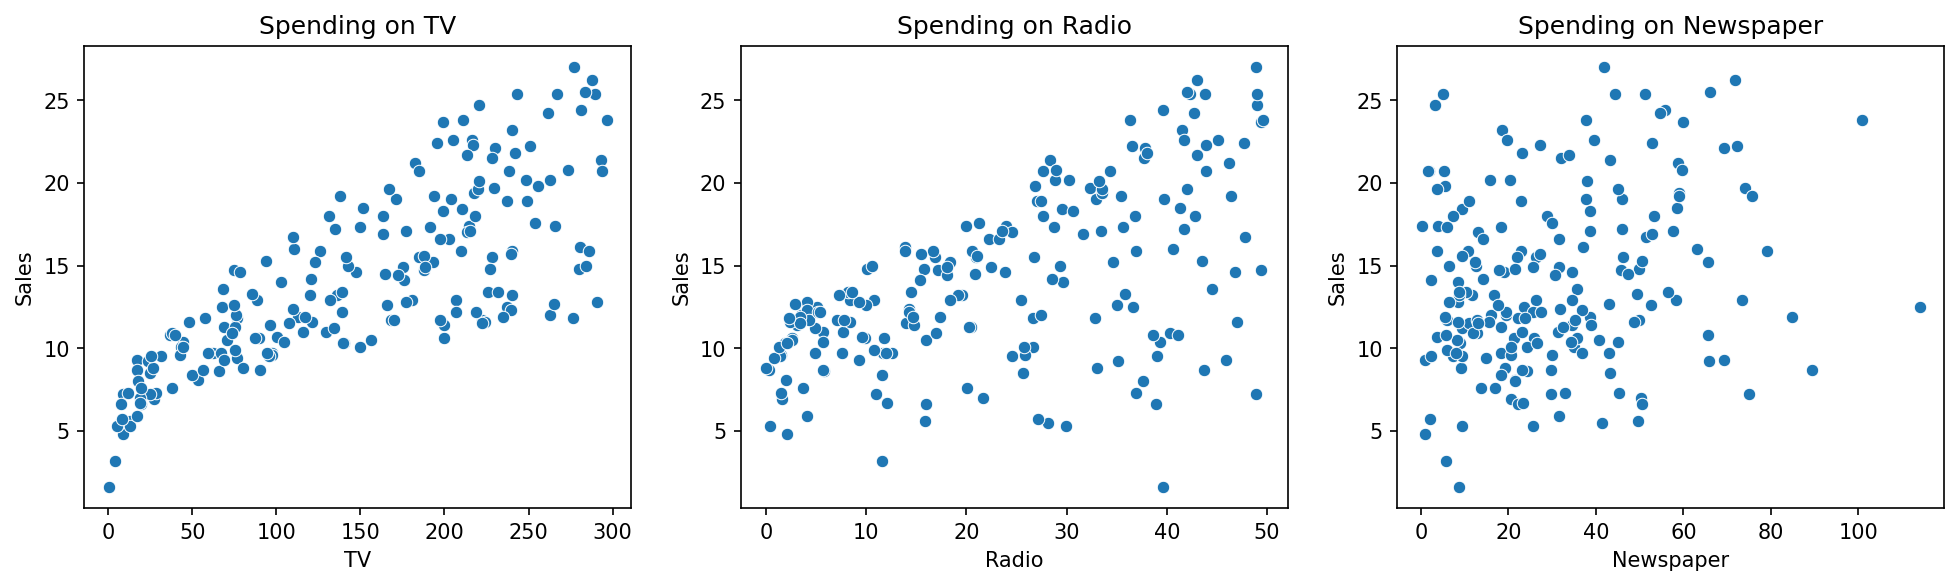

In [106]:
number_features = df.shape[1]-1

fig, ax = plt.subplots(1, number_features, figsize = (16,4), dpi = 150)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data= df, x = feature, y= "Sales", ax=ax[i])
    ax[i].set_title(f"Spending on {feature}")

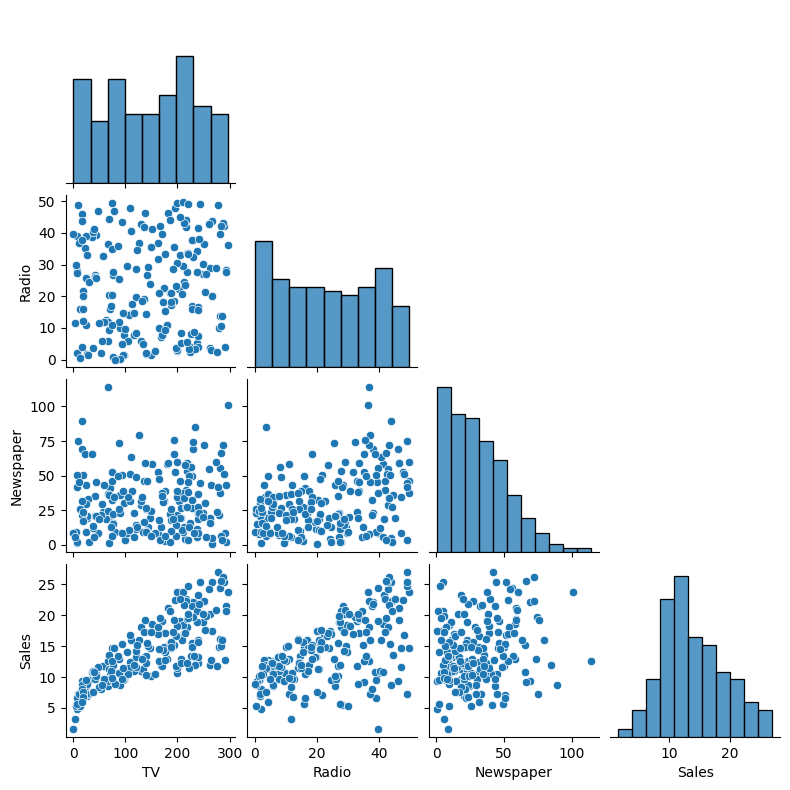

In [107]:
# pairplot lämpligt upp till 6 features
ax = sns.pairplot(df, height=2, corner=True)

## Simpel linjear regression

In [108]:
X, y = df["TV"], df["Sales"]
X

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [109]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [110]:
# polyfit ger ordinary least squares (OLS)
beta_1, beta_0 = np.polyfit(X, y, deg = 1) 
beta_1, beta_0

(0.04753664043301972, 7.032593549127696)

[Text(0.5, 1.0, 'Regression line on TV advertisement and sales')]

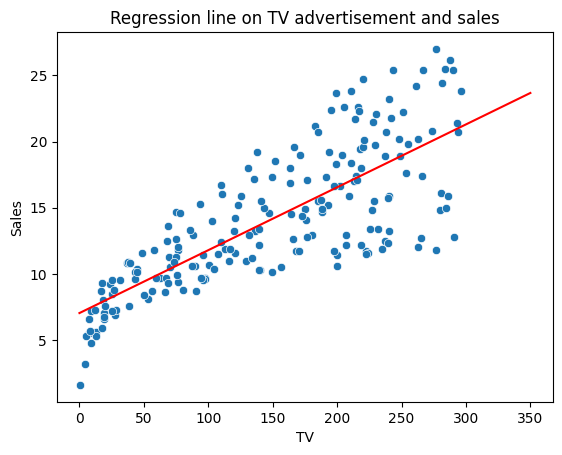

In [111]:
y_hat = lambda x: beta_0 + beta_1*x

spending = np.linspace(0,350)

ax = sns.scatterplot(data=df, x = "TV", y = "Sales")
sns.lineplot(x=spending, y=y_hat(spending), color ="red")
ax.set(title = "Regression line on TV advertisement and sales")

<AxesSubplot: xlabel='TV', ylabel='Sales'>

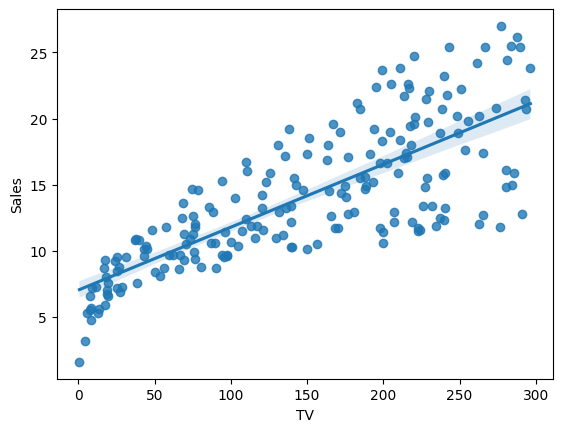

In [112]:
# regplot som gör samma om ovan
sns.regplot(x=X, y=y)

## Multiple linear regression

In [113]:
X,y = df.drop("Sales", axis = "columns"), df["Sales"]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [114]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [115]:
X.insert(0, "Intercept", 1)

In [116]:
X.head()

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [117]:
# @ operator callas för matmul operator
# i numpty overloaded to handle matrix multiplication (finns inte i Python)
# .T för transponat
X.T@X

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [118]:
# normal equation  - OLS
# inverting and multiplying with X_transposea and y
# result is beta_hut vector which defines the final plane in 4 dim
beta_hat = np.linalg.inv(X.T@X) @ X.T @ y
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [119]:
# making above inte a function to be able to use on subsets of the data set later
regression_fit = lambda X,y : np.linalg.inv(X.T@X) @ X.T @ y
beta_hat = regression_fit(X,y)
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [120]:
# prediction using the whole data set
predict = lambda x, beta: np.dot(x, beta) #dot ger skalärprodukt

test_sample = [1, 230, 38, 69] # a sample that we make up for this example
y_hat = predict(test_sample, beta_hat)
print(f"With $230k on TV and $38k on radio and $69k on newspaper we get a predicted sales on {y_hat:.1f}k units")

With $230k on TV and $38k on radio and $69k on newspaper we get a predicted sales on 20.6k units


## Train|test split

In [121]:
train_fraction = int(len(df) * 0.7) #int to get a whole number of datapoints, 0.7 is arbitrary

train = df.sample(n=train_fraction, random_state = 42, replace=False) # False means values are not put back after sampling, random_state to get same sampling
train.head()

,TV,Radio,Newspaper,Sales
96,163.3,31.6,52.9,16.9
16,195.4,47.7,52.9,22.4
31,292.9,28.3,43.2,21.4
159,11.7,36.9,45.2,7.3
129,220.3,49.0,3.2,24.7


In [122]:
test = df.drop(train.index)
test.shape, train.shape # adds up to 200 points

((60, 4), (140, 4))

In [123]:
X_train, y_train = train.drop("Sales", axis = "columns"), train["Sales"]
X_test, y_test = test.drop("Sales", axis = "columns"), test["Sales"]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 3), (140,), (60, 3), (60,))

In [124]:
X_train.insert(0, "Intercept", 1) # adding column with 1
X_test.insert(0, "Intercept", 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

## Prediction

In [125]:
beta_hat = regression_fit(X_train, y_train)
print(f"Beta parameters:\n{beta_hat}")

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1)) # reshape into a column vector

y_hat = predict(X_test, beta_hat).to_numpy()
y_hat[:5]

Beta parameters:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [126]:
X_test.iloc[1]
# spending $120.2k on TV, $19.6k on radio and $11.6k pm newspaper gives prediction on 12.19k units

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 8, dtype: float64

## Evaluation of model performance

In [134]:
m = len(y_test)

# removed extra dimension (60,1) -> (60)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test - y_hat))
mean_squared_error = 1/m*np.sum((y_test - y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

mean_absolute_error, mean_squared_error, root_mean_squared_error

(1.3244490959726523, 3.540425618238498, 1.8816018755939041)